# Taylor Imhof
# Bellevue University | DSC 550
# Final Project Milestone #1
# 2/02/2022

## Load Required Libraries

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV Data Into Pandas Dataframe

In [3]:
# read in data
data = pd.read_csv('data/marketing_data.csv')
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [5]:
# check dimensions of data set
data.shape

(2240, 28)

In [7]:
# display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

This dataset contains 2240 records with 28 columns in total. After reviewing the Dtype column produced from info(), I noticed that income was encoded as a string and had some additional whitespace in the column name.

## Cleaning Income Column

In [27]:
# rename income column to remove extra whitespace
data.rename({" Income ": "Income"}, axis=1, inplace=True)

# to check that changes were put into effect
data.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [29]:
## utility function to clean string formatted currency to float by removing commas and dollar signs
def clean_currency(dollars):
    """
    args: string containing dollar sign and comma characters
    returns: 
    """
    if isinstance(dollars, str):
        return(dollars.replace('$', '').replace(',', ''))
    return(dollars)

In [32]:
# create copy
clean_income = data.copy()

# apply clean currency utilty function to income column
clean_income['Income'] = clean_income['Income'].apply(clean_currency).astype(float)

# check dtype to ensure changes were put into effect
clean_income['Income'].dtype

dtype('float64')

## Graphical Analysis Of `Income` Column

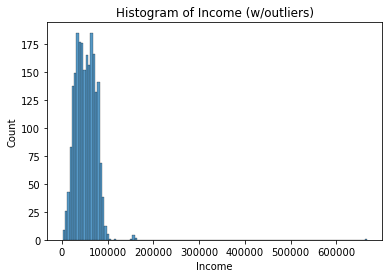

In [63]:
# display histogram of income distribution
sns.histplot(data=clean_income['Income'])
plt.title('Histogram of Income (w/outliers)')
plt.show()

There looks like there are a few outliers in the income column. In order to get a better look at potential outliers, I decided to graph a boxplot of the income column.

Text(0.5, 1.0, 'Boxplot of Income Column')

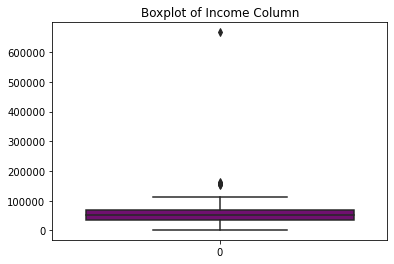

In [64]:
# create boxplot of income column
sns.boxplot(data=clean_income['Income'], color='purple')
plt.title('Boxplot of Income Column')

It looks like there is one very anomalous outlier at > 600000, so I decided to filter down the rows to customers with income below 200000.

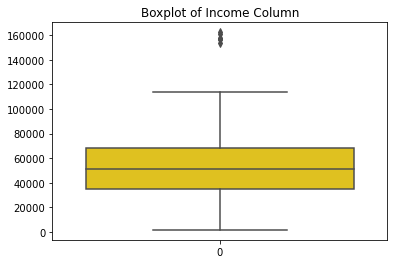

In [51]:
# create copy
filter_income = clean_income.copy()

# filter income to values below 200000
filter_income = filter_income[filter_income['Income'] < 200000]

# display new boxplot to see if more filtering might be necessary
sns.boxplot(data=filter_income['Income'], color='gold')
plt.title('Boxplot of Income Column')
plt.show()

After reviewing this boxplot it looks like while there are still a few outliers, I felt that they were close enough to the "norm" to be acceptable observation values.

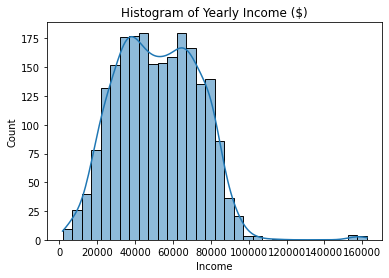

In [50]:
# create histogram of cleaned and filtered income column
sns.histplot(data=filter_income['Income'], kde=True)
plt.title('Histogram of Yearly Income ($)')
plt.show()

## Graphical Analysis Of `Year_Birth` Column

Another column of data that I wanted to get a better feel for how it was distributed was the column noting each customer's birth year.

In [43]:
filter_income.shape

(2215, 28)

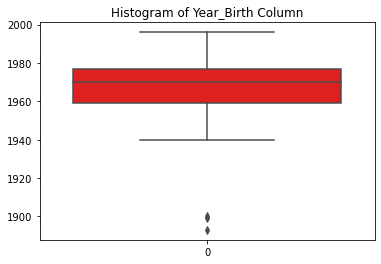

In [48]:
# identify potential outliers with boxplot
sns.boxplot(data=filter_income['Year_Birth'], color='red')
plt.title('Histogram of Year_Birth Column')
plt.show()

It looks like there are a few outliers, so I decided to filter the data for customer's who were born after 1920.

In [44]:
# create copy
filter_birth = filter_income.copy()

# filter customers born after 1920
filter_birth = filter_birth[filter_birth['Year_Birth'] > 1920]
filter_birth.shape

(2212, 28)

After filtering by birth year, only three observations were lost.

Text(0.5, 1.0, 'Histogram of Year_Birth Distriubtion')

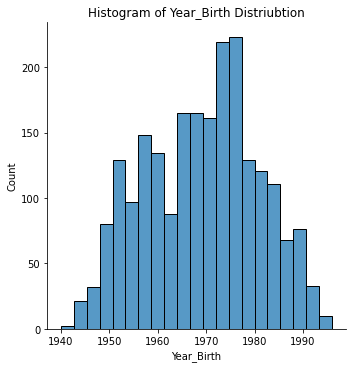

In [54]:
# plot histogram of birth year column
sns.displot(data=filter_birth, x='Year_Birth')
plt.title('Histogram of Year_Birth Distriubtion')

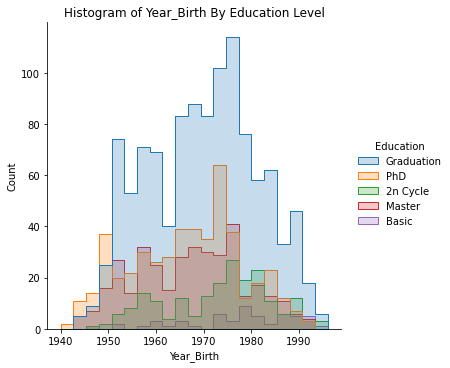

In [46]:
# displot filtered by level of education 
sns.displot(data=filter_birth, x='Year_Birth', hue='Education', element='step')
plt.title('Histogram of Year_Birth By Education Level')
plt.show()

I decided to add an additional `hue` parameter so that I could see how the distributions of the customer's birth year varied by their respective education level.

Observations: The bulk of the customer's contained in this dataset were born in the mid-70's. It looks like the ages of the customers (today) range from about 28 - 80 years old. When I added the `hue` parameter to filter by education level, I could see that most of the customer's have graduated from college, while a decent amount of the older folks (born before 1970) have received their Ph.D. I felt that was pretty interesting!

## Graphical Analysis of `Education` Column

While I was able to make some general conclusions about how many customers belonged to each of the different levels of education, I felt that reviewing a bar chart of the education level column would provide more evident insights.

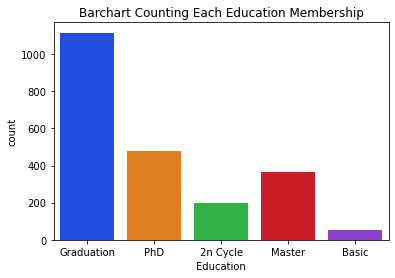

In [61]:
# create bar chart of education column
sns.countplot(x=filter_birth['Education'], palette='bright')
plt.title('Barchart Counting Each Education Membership')
plt.show()

Observations: Again, it would appear that the bulk of the customers in the dataset have received their college degrees. I found it interesting that the count of Ph.D. holders was greater than those with Master's degrees. I wasn't exactly sure what '2n cycle education' meant, but after looking into it a bit, it would seem to mean that the customer is currently pursuing their Master's (perhaps this is more popular in different countries?)

## Graphical Analysis of Country Column

The last column that I wanted to get a feel for before diving into the data transformation stage was the country column. I was curious to see the different countries that were included in this dataset, as well as how many customers belonged to each country. I felt the best approach to seeing this visually would be accomplished by a piechart.

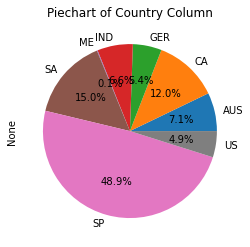

In [67]:
# display pie chart of country value membership
data.groupby('Country').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Piechart of Country Column')
plt.show()

After reviewing this piechart, there are quite a few countries included in this dataset. Nearly half of the customers are from Spain (I am guessing that the professor that created this dataset is Spanish), while the next largest country participating in the dataset is Saudi Arabia, followed by Canada, Australia, and the US. This visualization was quite useful, as it helped me identify potential new columns to create/combine or drop altogether. For example, the percentage of customers from ME (I believe this is Montenegro?) is only 0.1% so customers from there could be dropped without much impact. Also, I might be able to get away with combining Canada and the US into a North America country as we are so similar in culter and location.